*Автор: Андрей Кулинич, ai@kulinich.ru
        Антон Кошелев, aakoshelev@gmail.com*

Может свободно использоваться. Если не сможете повторить подобный анализ, буду рад быть полезным (научить или выполнить с расшифровкой для вас).

# В поисках лучших клиентов

Ключевой актив любой компании - это ее клиенты. Они могут как приносить прибыль и формировать устойчивое будущее компании, так и наносить финансовый ущерб. И это наиболее важная область деятельности компании, где теребуется наладить анализ, учет и контроль. Вплоть до того, чтобы ввести новый функицонал: бухгалтер по клиентам. Ведь за потерю клиента, в отличии от других материальных аткивов компании никто не отвечает.

С другой стороны, предложенная схема анализа клиентской базы это первый шаг к использованию машинного обучения в продажах и маркетинге. А это:
* понимания рисков и приоритетов по каждому из клиентов. Результаты анализа часто переворачивают базовые представления о клиентах. 
* сегметация клиентов на основе поведенческих факторов (покупок).
* автоматизация рекомедаций по дополнительным товарам и услугам, поиск возможностей для допродаж клиентам.
* предсказание периода будущей покупки и структуры покупки (товары, бренды).
* предсказание риска ухода клиента.
* поиск новых клиентов исходя их профиля их прибыльности/привлекательности для компании. В сети свободно опубликованы базы, например, ФНС, которые можно использовать для обогащения и подбора новых клиентов.
* автоматическое профилирование (оценка привлекательности) клиентов на входе.
* динамическое/динамическое персональное ценообразование.
* персонализация маркетинга и многое другое. 

Ниже представлен полноценный, комплексный алгоритм анализа клиентской базы с кодом и пояснениями. В качестве имен клиентов используются случаной выбранные русские имена. Сам датасет, на котором проводился анализ не будет предоставлен. Но будет описана структура файла с данными. Вы можете или самостоятельно провести анализ или обратиться ко мне за содействием. 

# На что обратить внимание 

Рассмотрим следующие подходы к анализу клиентов:
+ Анализ выбросов
+ Когортный анализ
+ Ассоциативные правила


# Изучаем данные на предмет выбросов

Загрузим базовые библиотеки и изучим данные на предмет выбросов. Любые данные чаще всего содержат искажения, ошибки, нестандартные события и тд, которые нуждаются в корректировке и очистке.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#загружаем файл с данными
df=pd.read_excel('Q_sample_data.xlsx', sheet_name='Data')
df.head()

,Name,Segment,Invoice,Date,Level1,Level2,Level3,Level4,SKU,Qnty,Revenue,Cost
0,ярослава,Ho-Re-Ka,Фр00-017166,2016-10-28,HoReCa,ЗАМОРОЗКА,Мясо говядины,NaN,"Говядина вырезка 1,4-1,8кг Tenderloin с/м Браз...",200.00,"276,000.00","160,164.12"
1,емилий,Ho-Re-Ka,Фр00-015446,2016-11-14,HoReCa,ЗАМОРОЗКА,Мясо говядины,NaN,"Говядина вырезка 1,4-1,8кг Tenderloin с/м Браз...",100.00,"138,000.00","80,000.00"
2,ярослава,Ho-Re-Ka,Фр00-013330,2016-09-30,HoReCa,ЗАМОРОЗКА,Мясо говядины,NaN,"Говядина вырезка 1,4-1,8кг Tenderloin с/м Браз...",77.00,"110,033.00","63,140.00"
3,ярослава,Ho-Re-Ka,Фр00-013196,2016-09-30,HoReCa,ЗАМОРОЗКА,Мясо говядины,NaN,"Говядина вырезка 1,4-1,8кг Tenderloin с/м Браз...",75.00,"107,175.00","61,500.00"
4,емилий,Ho-Re-Ka,00UT-002406,2017-06-03,HoReCa,ЗАМОРОЗКА,Мясо говядины,NaN,"Говядина вырезка 1,4-1,8кг Tenderloin с/м Браз...",34.40,"49,151.88","27,516.80"


Исходно у нас не самый оптимальный по использованию памяти файл, но с ним достаточно удобно работать. Чаще всего, на входе три таблицы:
* данные о транзакциях
* справочник клиентов
* справочник товаров. 

В данном случае эти справочники объединены в один файл. Каждая строчка - это отдельное наименование, котрое было поставлено клиенту. Ниже расшифровка значений полей.
* 'Name' название клиента (для кодирования использовались русские имена, выбранные случайным образом).
* 'Segment' сегмент, к котрому принадлежит клиент. Это внутрення историческая сегментация компании.
* 'Invoice' номер документа, по которому была осуществлена отрузка. 
* 'Date' дата продажи.
* 'Level1', 'Level2', 'Level3', 'Level4' уровень справочника товаров, к которому принадлежит позиция.
* 'SKU' наименование товара.
* 'Qnty' количество единиц продукта.
* 'Revenue' стоимость продукта.
* 'Cost' себестоимость продукта.

Для анализа нам потребуются дополнительно рассчитанные поля. В частности, занчение дохода от продажи данного товара.

In [3]:
# добавим поле с прибылью от продажи
df['Profit']=df['Revenue']-df['Cost']

In [4]:
df['Date'].describe()

count                  242943
unique                    399
top       2016-07-27 00:00:00
freq                     1311
first     2015-01-10 00:00:00
last      2017-12-01 00:00:00
Name: Date, dtype: object

Итого у нас есть данные за три года. Сейчас в наборе данных 242943 строки начина с 1 января 2015 года до 1 декабря 2017 года. Посмотрим на основные статистики.

In [5]:
df.describe()

,Qnty,Revenue,Cost,Profit
count,"242,922.00","242,927.00","242,943.00","242,927.00"
mean,7.91,626.56,391.97,234.58
std,34.93,"2,041.35","1,285.61",806.93
min,0.07,-86.04,0.02,"-28,043.90"
25%,2.00,140.00,87.50,52.50
50%,5.00,258.00,159.30,92.07
75%,10.00,555.00,370.00,201.38
max,"9,000.00","276,000.00","160,164.12","115,835.88"


В строке count указано количество значимых строк для каждого столбца. Мы видим, что в поле количество есть пропуски, что приводит к пропуска в столбцах с выручкой. В данном случае, у нас нет возможности разобраться в причинах пропусков и мы просто удалим это относительно небольшое количество строк. 

In [6]:
# удалим, чтобы не было ошибок, но стоит разобраться
df.dropna(subset=['Qnty'], axis=0, inplace=True)

Обращает внимание статистика по столбцу Qnty. Так, 75% строк содержат меньше 10 единиц. Но есть строка с количеством единиц товара в 9 000 единиц. Давайте посмотрим на них подробнее. Отфильтруем все строки с количеством более 2000 единиц товара. 

In [7]:
df[df['Qnty']>2000]
#все ок, вполне реально в таком количестве

,Name,Segment,Invoice,Date,Level1,Level2,Level3,Level4,SKU,Qnty,Revenue,Cost,Profit
20539,феня,Офис,Фр00-001979,2016-02-22,HoReCa,ЯПОНСКАЯ КУХНЯ,Для суши,NaN,Палочки бамбуковые 1/30пак/100шт.Китай,"9,000.00","15,300.00","9,000.00","6,300.00"
20540,евдокия,Регион 5,00UT-002665,2017-10-03,HoReCa,ЯПОНСКАЯ КУХНЯ,Для суши,NaN,Палочки бамбуковые 1/30пак/100шт.Китай,"8,900.00","11,570.00","7,832.00","3,738.00"
20541,юлиан,Ho-Re-Ka,Фр00-002881,2016-11-03,HoReCa,ЯПОНСКАЯ КУХНЯ,Для суши,NaN,Палочки бамбуковые 1/30пак/100шт.Китай,"3,100.00","6,200.00","3,100.00","3,100.00"
20542,костюня,Ho-Re-Ka,Фр00-001421,2015-10-29,HoReCa,ЯПОНСКАЯ КУХНЯ,Для суши,NaN,Палочки бамбуковые 1/30пак/100шт.Китай,"3,000.00","6,000.00","3,000.00","3,000.00"
20543,кирила,Ho-Re-Ka,Фр00-001759,2015-05-11,HoReCa,ЯПОНСКАЯ КУХНЯ,Для суши,NaN,Палочки бамбуковые 1/30пак/100шт.Китай,"3,000.00","6,000.00","3,000.00","3,000.00"
20544,юлиан,Ho-Re-Ka,Фр00-008210,2016-06-23,HoReCa,ЯПОНСКАЯ КУХНЯ,Для суши,NaN,Палочки бамбуковые 1/30пак/100шт.Китай,"3,000.00","6,000.00","3,100.00","2,900.00"
20545,валентин,Ho-Re-Ka,Фр00-010382,2016-05-08,HoReCa,ЯПОНСКАЯ КУХНЯ,Для суши,NaN,Палочки бамбуковые 1/30пак/100шт.Китай,"3,000.00","6,000.00","3,100.00","2,900.00"


Ничего необычного в количестве палочек для суши. Давайте посмотрим на распределение по количеству единиц товара. Правда, корректно это было смотреть в рамках категорий или даже отдельных товаров в поиске отклонений.

Мы видим, что преобладает небольшое, до 5 единиц количество товара.

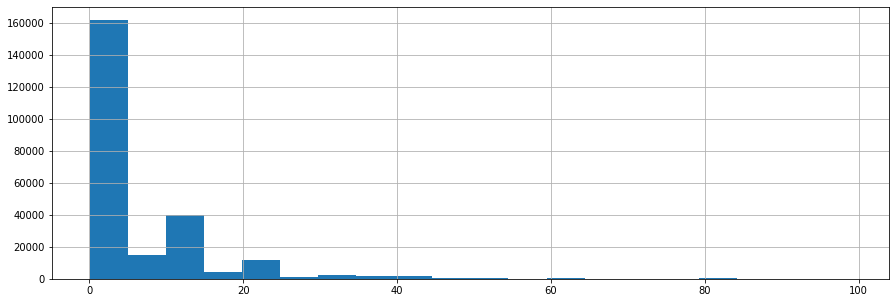

In [8]:
df[df['Qnty']<100]['Qnty'].hist(figsize=(15,5), bins=20);

Есть некоторое количество строк с отрицательной выручкой, давайте взгляним на них.

In [9]:
df[df['Revenue']<0]

,Name,Segment,Invoice,Date,Level1,Level2,Level3,Level4,SKU,Qnty,Revenue,Cost,Profit
126257,гапа,VIP,Фр00-011721,2016-01-09,КОНДИТЕРСКИЕ ИЗДЕЛИЯ,Восточные сладости,Конфеты,NaN,Ирис Тимоша 250г конфеты со сгущеным молоком 1...,2.00,-26.05,85.12,-111.17
171450,гапа,VIP,Фр00-000214,2016-12-01,КОНДИТЕРСКИЕ ИЗДЕЛИЯ,Восточные сладости,"Рахат-лукум, чак-чак, щербет",NaN,Щербет Тимоша 250г молочно-ореховый 1/16шт Россия,1.00,-18.69,38.63,-57.32


Скорее всего возврат на небольшую сумму и количество. Удалим эти строки из массива.

In [10]:
df.drop(df.loc[df['Revenue']<0].index, inplace=True)

Стоит внимательно посмотреть и на строки с экстремально большой выручкой.

In [11]:
df[df['Revenue']>100000]

,Name,Segment,Invoice,Date,Level1,Level2,Level3,Level4,SKU,Qnty,Revenue,Cost,Profit
0,ярослава,Ho-Re-Ka,Фр00-017166,2016-10-28,HoReCa,ЗАМОРОЗКА,Мясо говядины,NaN,"Говядина вырезка 1,4-1,8кг Tenderloin с/м Браз...",200.00,"276,000.00","160,164.12","115,835.88"
1,емилий,Ho-Re-Ka,Фр00-015446,2016-11-14,HoReCa,ЗАМОРОЗКА,Мясо говядины,NaN,"Говядина вырезка 1,4-1,8кг Tenderloin с/м Браз...",100.00,"138,000.00","80,000.00","58,000.00"
2,ярослава,Ho-Re-Ka,Фр00-013330,2016-09-30,HoReCa,ЗАМОРОЗКА,Мясо говядины,NaN,"Говядина вырезка 1,4-1,8кг Tenderloin с/м Браз...",77.00,"110,033.00","63,140.00","46,893.00"
3,ярослава,Ho-Re-Ka,Фр00-013196,2016-09-30,HoReCa,ЗАМОРОЗКА,Мясо говядины,NaN,"Говядина вырезка 1,4-1,8кг Tenderloin с/м Браз...",75.00,"107,175.00","61,500.00","45,675.00"
76,настас,Регион 6,00UT-002818,2017-03-14,ЗАМОРОЗКА,Мясные полуфабрикаты,"Сосиски, сардельки",NaN,Сосиски Обнинские 1/5 Молочные вес Россия,"1,500.00","225,750.00","120,000.00","105,750.00"
4554,анатолька,Ho-Re-Ka,Фр00-011175,2016-08-22,HoReCa,ЗАМОРОЗКА,"Картофель фри, дольки, ростисы",NaN,"Картофель Стар Жульен 2,5кг Классика 6мм 1/5шт...",500.00,"235,000.00","158,332.00","76,668.00"
4555,анатолька,Ho-Re-Ka,Фр00-006033,2016-05-16,HoReCa,ЗАМОРОЗКА,"Картофель фри, дольки, ростисы",NaN,"Картофель Стар Жульен 2,5кг Классика 6мм 1/5шт...",350.00,"172,200.00","112,000.00","60,200.00"
4556,анатолька,Ho-Re-Ka,Фр00-006265,2016-05-18,HoReCa,ЗАМОРОЗКА,"Картофель фри, дольки, ростисы",NaN,"Картофель Стар Жульен 2,5кг Классика 6мм 1/5шт...",250.00,"123,000.00","80,000.00","43,000.00"
5646,людаха,Регион 5,Фр00-016520,2016-05-10,ЗАМОРОЗКА,Морепродукты,"Креветки, улитки, крабовое мясо",NaN,Креветка 1кг 16/20 б/г с/м 1/10шт Китай 40% глаз.,300.00,"183,600.00","144,000.00","39,600.00"
5652,людаха,Регион 5,00UT-000681,2017-01-02,ЗАМОРОЗКА,Морепродукты,"Креветки, улитки, крабовое мясо",NaN,Креветка Guolian OGOOD 1кг16/20 б/г с/м 1/10шт...,200.00,"149,400.00","118,400.00","31,000.00"


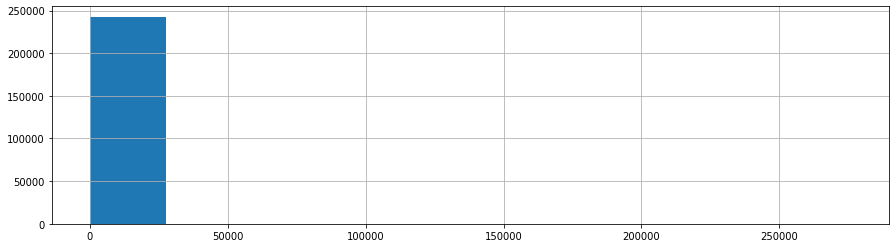

In [12]:
df['Revenue'].hist(figsize=(15,4));

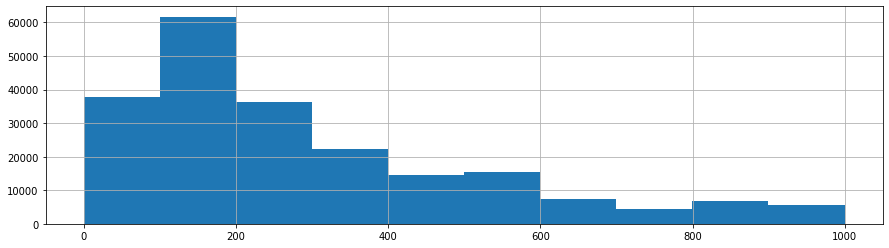

In [13]:
df[df['Revenue']<1000]['Revenue'].hist(figsize=(15,4));

Формально, и это видно по первой гистограмме, эти покупки являются выбросом. Основная масса покупок сосредоточена в диапазоне относительно небольших цифр. Но так как часть заказов повторялась, не будем корректирвать наш набор данных в части этих проводок. Но стоит держать их в уме, так как наличие таких выбросов может искажать часть результатов анализов, например, при выполнении кластеризации. 

## Выбросы в разрезе заказов

До этого мы смотрели выбросы в части отдельных строк набора данных. Ниже мы сгруппируем все результаты до заказа (группировка по номеру документа) и рассмотрим на предмет выбросов.

In [14]:
# сводная таблица
df_invoice=df.pivot_table(values=['Date', 'Name', 'Segment', 'Revenue', 'Qnty', 'Profit'], index='Invoice',
                        aggfunc={ 'Date': 'first', 'Name':'first', 'Segment':'first', 'Revenue': np.sum, 
                                 'Qnty':np.sum, 'Profit':np.sum}).reset_index()
df_invoice.head()

,Invoice,Date,Name,Profit,Qnty,Revenue,Segment
0,00UT-000001,2017-01-17,любаха,"8,238.00",26.00,"20,118.00",Ho-Re-Ka
1,00UT-000002,2017-01-17,стефана,"4,483.10",271.00,"11,738.00",Регион 5
2,00UT-000003,2017-01-17,игорюша,"1,983.70",41.00,"5,180.00",Регион 6
3,00UT-000004,2017-01-17,игорюша,475.00,5.00,875.00,Регион 6
4,00UT-000005,2017-01-17,антонидка,"1,570.79",93.00,"4,053.00",Регион 6


In [15]:
df_invoice.describe()

,Profit,Qnty,Revenue
count,"20,682.00","20,682.00","20,682.00"
mean,"2,755.33",92.94,"7,359.44"
std,"4,529.46",187.42,"12,221.28"
min,"-44,019.96",0.15,0.01
25%,652.60,12.50,"1,750.00"
50%,"1,405.95",42.22,"3,646.64"
75%,"2,964.62",102.00,"7,739.28"
max,"115,835.88","9,377.00","276,000.00"


Стандартно видим наличие экстремально больших счетов по сумме и количеству едениц товаров в счете. Посмотрим на них внимательнее.

In [16]:
df_invoice[df_invoice['Revenue']>200000]

,Invoice,Date,Name,Profit,Qnty,Revenue,Segment
2596,00UT-002818,2017-03-14,настас,"105,750.00","1,500.00","225,750.00",Регион 6
14460,Фр00-011175,2016-08-22,анатолька,"76,668.00",500.00,"235,000.00",Ho-Re-Ka
19795,Фр00-017166,2016-10-28,ярослава,"115,835.88",200.00,"276,000.00",Ho-Re-Ka


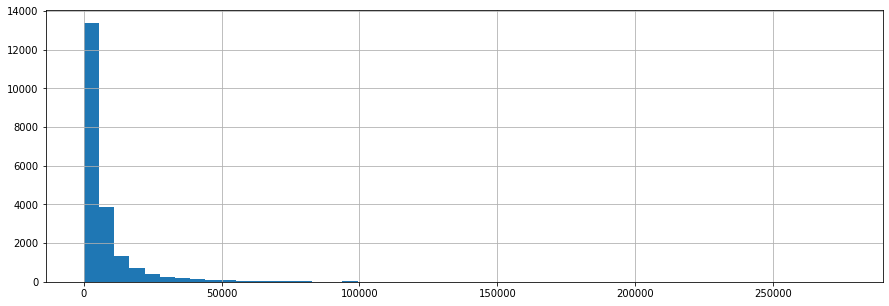

In [17]:
df_invoice['Revenue'].hist(figsize=(15,5), bins=50);

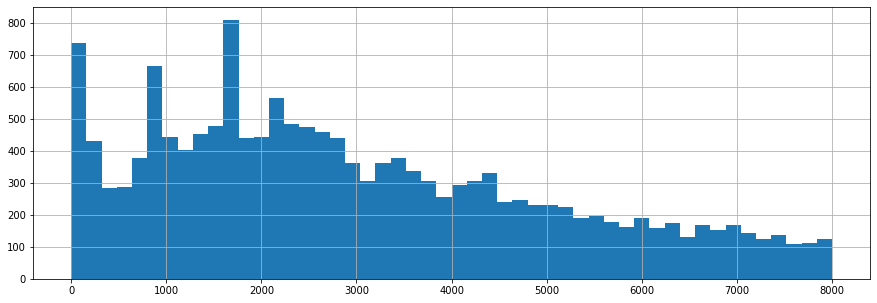

In [18]:
df_invoice[df_invoice['Revenue']<8000]['Revenue'].hist(figsize=(15,5), bins=50);

Это уже известные нам заказы. Оставим из в общем массиве.В тоже время видим, что основная масса заказов лежит в диапазоне до 3600 тыс рублей. 

## Выбросы в разрезе клиентов

Осталось рассмотреть выбросы в разерезе клиентов. Сгруппируем данные по клиентам. 

In [19]:
df_name=pd.pivot_table(df, values=['Revenue', 'Qnty', 'Profit', 'Segment'], index=['Name'], aggfunc={'Revenue':np.sum, 'Qnty': np.sum, 
                                    'Profit':np.sum, 'Segment':'first'}).reset_index()
df_name.head()

,Name,Profit,Qnty,Revenue,Segment
0,авдотьюшка,"6,260.73",125.00,"15,214.00",Регион 4
1,авдуся,"41,284.49",688.00,"120,284.40",Офис
2,агриппа,"95,513.01","4,997.00","260,836.75",Регион 6
3,адя,"12,728.14","1,139.00","34,389.00",Регион 4
4,аида,"48,035.98","2,158.38","126,496.48",Регион 6


In [20]:
df_name.describe()

,Profit,Qnty,Revenue
count,609.00,609.00,609.00
mean,"93,572.75","3,156.18","249,930.77"
std,"488,031.03","18,083.11","1,367,971.80"
min,0.00,1.00,93.00
25%,"9,227.65",277.00,"26,006.00"
50%,"29,749.82",930.70,"81,989.00"
75%,"69,759.47","2,496.00","189,844.80"
max,"11,270,564.73","429,421.92","31,946,749.39"


75% клиентов принесли за три года выручку компании не более 70 тыс рублей. В тоже время есть клиент с выручкой в 11 млн.

In [21]:
df_name[df_name['Revenue']>1000000]

,Name,Profit,Qnty,Revenue,Segment
64,артемон,"488,898.43","2,829.87","1,316,746.27",Ho-Re-Ka
84,валентин,"540,818.63","6,891.49","1,532,919.40",Ho-Re-Ka
99,василиск,"426,487.71","16,969.38","1,111,049.10",VIP 2
132,вира,"431,001.85","16,085.21","1,109,164.72",VIP 2
160,гапа,"11,270,564.73","429,421.92","31,946,749.39",VIP
188,дареша,"1,139,856.35","43,291.09","3,180,998.47",VIP 2
230,емилий,"1,118,098.11","6,943.95","3,251,677.10",Ho-Re-Ka
266,иулий,"415,312.34","16,956.00","1,137,401.80",VIP 2
267,кара,"1,739,462.19","55,616.68","4,610,370.36",VIP
288,корней,"730,709.85","33,055.75","2,067,459.98",Регион 1


Клиент "Гапа" - это виртуальный клиент, на котрого записывались все розничные продажи. Для чистоты эксперимента его также надо бы удалить, так как он не является типовым ни по каким параметрам.

In [22]:
df.drop(df.loc[df['Name']=='гапа'].index, inplace=True)

*После очистки от выбросов все группировки надо перестроить.*

Даже простейший анализ на выбросы учетных данных, приводит к появлению большого списка вопросов как к качеству учета, так и его адекватности. Исключений, когда данные не содержали бы ошибок/искажений еще не встречали. 

Давайте перейдем к анализу. 

# Когортный анализ

Суть данного вида анализа состоит в том, чтобы анализировать поведение групп людей или компанией, объединенных по какому-либо признаку во времени. В нашем случае, этим признаком будет год и квартал привлечения клиента.

Расчитаем когортный анализ погодам по всем клиентам.

Сгруппируем данные в разрезе каждого из документов, по которым была совершена продажа.


In [23]:
# перестраиваем
df_invoice=df.pivot_table(values=['Date', 'Name', 'Segment', 'Revenue', 'Qnty', 'Profit'], index='Invoice',
                        aggfunc={ 'Date': 'first', 'Name':'first', 'Segment':'first', 'Revenue': np.sum, 
                                 'Qnty':np.sum, 'Profit':np.sum}).reset_index()

Для упрощения анализа добавим столбец с годом, когда была соверщена продажа и сформируем список годов (нужен в технических целях).

In [24]:
df_invoice['InvoiceYear']=df_invoice['Date'].apply(lambda x: x.year)
ya=df_invoice['InvoiceYear'].unique()
ya.sort()
ya

array([2015, 2016, 2017])

Уточним по клиентам дату начала и окончания сотрудничества.

In [25]:
df_t1=pd.pivot_table(df, values=['Date'], index=['Name'], aggfunc={'Date': min}).reset_index()
df_t1.columns=['Name', 'start_date']
df_t2=pd.pivot_table(df, values=['Date'], index=['Name'], aggfunc={'Date': max}).reset_index()
df_t2.columns=['Name', 'last_date']
df_name=pd.merge(df_name, df_t1, on='Name')
df_name=pd.merge(df_name, df_t2, on='Name')

df_name['start_year']=df_name['start_date'].apply(lambda x: x.year)
df_name['last_year']=df_name['last_date'].apply(lambda x: x.year)
df_name.head()

,Name,Profit,Qnty,Revenue,Segment,start_date,last_date,start_year,last_year
0,авдотьюшка,"6,260.73",125.00,"15,214.00",Регион 4,2017-03-21,2017-03-22,2017,2017
1,авдуся,"41,284.49",688.00,"120,284.40",Офис,2015-07-12,2016-11-01,2015,2016
2,агриппа,"95,513.01","4,997.00","260,836.75",Регион 6,2015-04-11,2017-11-01,2015,2017
3,адя,"12,728.14","1,139.00","34,389.00",Регион 4,2015-09-11,2016-05-23,2015,2016
4,аида,"48,035.98","2,158.38","126,496.48",Регион 6,2015-02-11,2016-12-09,2015,2016


In [26]:
all_r=[]
for i in range(0,len(ya)-1):
    start=len(df_name[(df_name['start_year']==ya[i])])
    t=[0 for x in range(i)]
    for j in range(i+1,len(ya)):
        t.append(round(len(df_name[(df_name['start_year']==ya[i]) & (df_name['last_year']>=ya[j])])/start,2))
    all_r.append(t)
pd.DataFrame(all_r, columns=ya[1:], index=ya[:-1])

,2016,2017
2015,0.92,0.62
2016,0.00,0.66


Мы видим, что из клиентов кто работал с нами с 2015 года в 2016 осталось 92%, а в 2017 - 62%. В тоже время их тех, кого мы привлекли в 2016 году, в 2017 году с нами осталось уже только 66%. Вывод напрашивается достаточно простой - ядро продаж компании, это старые и преданные клиенты. А на привлечение новых мы тратим больше, чем они нам приносят.

Давайте попробуем взглянуть на это через кварталы. Надо провести некотрые рассчеты.

In [27]:
df_name['MinPurchaseQuarter'] = df_name['start_date'].map(lambda date: 10*date.year + date.quarter)
df_name['MaxPurchaseQuarter'] = df_name['last_date'].map(lambda date: 10*date.year + date.quarter)

my_all=[]
min_y=df_name['start_year'].min()
max_y=df_name['last_year'].max()
max_date=df_name['MaxPurchaseQuarter'].max()
for y in range(min_y, max_y+1):
    for m in range(1,5):
        nl=y*10+m
        if nl>max_date: break
        my_all.append(nl)

In [28]:
all_r=[]
for i in range(len(my_all)):
    start=len(df_name[(df_name['MinPurchaseQuarter']==my_all[i])])
    if start==0: start=1
    t=[0 for x in range(i)]
    for j in range(i,len(my_all)):
        t.append(round(len(df_name[(df_name['MinPurchaseQuarter']==my_all[i]) & 
                                   (df_name['MaxPurchaseQuarter']>=my_all[j])])/start,2))
    all_r.append(t)
data=pd.DataFrame(all_r, columns=my_all, index=my_all)
data

,20151,20152,20153,20154,20161,20162,20163,20164,20171,20172,20173,20174
20151,1.00,1.00,1.00,1.00,0.96,0.94,0.93,0.89,0.67,0.55,0.51,0.32
20152,0.00,1.00,0.96,0.96,0.90,0.89,0.88,0.83,0.61,0.43,0.33,0.23
20153,0.00,0.00,1.00,0.93,0.88,0.83,0.78,0.73,0.59,0.51,0.46,0.32
20154,0.00,0.00,0.00,1.00,0.86,0.82,0.81,0.72,0.44,0.28,0.25,0.14
20161,0.00,0.00,0.00,0.00,1.00,0.99,0.99,0.97,0.79,0.61,0.50,0.35
20162,0.00,0.00,0.00,0.00,0.00,1.00,0.81,0.78,0.51,0.43,0.35,0.08
20163,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.68,0.52,0.40,0.40,0.28
20164,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.63,0.30,0.26,0.07
20171,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.28,0.26,0.05
20172,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Как всегда, человек лучше и быстрее воспринимает таблицы в виде графиков. В нашем случае, тепловых карт.

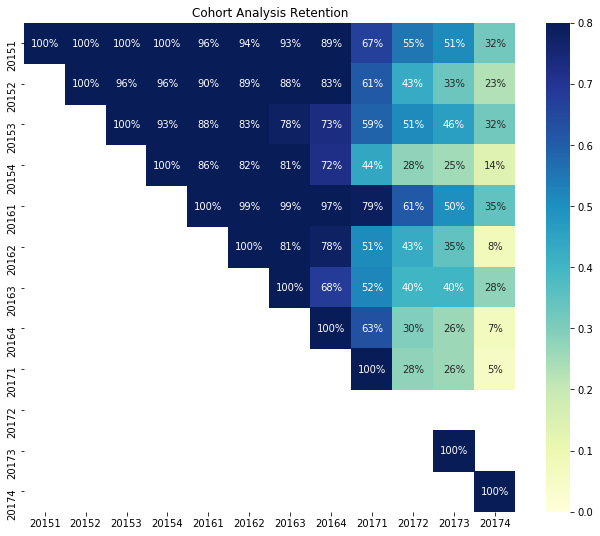

In [29]:
data[data==0]=np.nan

plt.figure(figsize = (11,9))
plt.title('Cohort Analysis Retention')
sns.heatmap(data = data, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.8,
            cmap = "YlGnBu")
plt.show()

Эта диграмма полностью подтверждает нашу гипотезу. Те клиенты, которые были с нами до и с 2015 года более стабильны и устойчивы. Новых мы не могли удерживать и в следующем квартале от нал уходило уже 72% (как пример, клиенты привлеченные в 1 квартале 2017 года). Мы тратили на их привлечение больше, чем получали доход. Это подрывало наш бизнес. Выручка расла, а вот прибыль компании падала. 

Когортный анализ полезно проводить не только в целом по компании, но и по:
* сегментам 
* каналам привлечения
* подразделениями
* товарным группам.

А также в разрезе выручки и прибыли.

Для профилактики ухода можно сегментировать клиентов внутри базы, назначив индивидуальные мероприятия по каждому. Это можно делать используя как машинное обучения для оценки риска потери клиента, так и существенно более простую технику RFM анализ.

# Сегментация исходя из продуктовой корзины

В сегментации все больше за основу стараются брать миссию клиента. По сути, под покупательной миссией можно понимать истинную цель и причины, по которым покупатель делает тот или иной выбор. 

Изучим базовые предпочтения клиентов по сегментам.

## Интересы по сегментам

В данном случае, мы смотрим всю историю покупок клиента. Когда клиент, делал покупки хотя бы один раз. Но можно брать и проникновение товара или товарной группы в счет. Проникновение в счет, например, лучше показывает значимость товара для клиента. Мы же пока говорим про общую структуру покупок клиента. 

In [30]:
segment=df.Segment.dropna().unique()
voc_st={}
for s in segment:
    df_t=pd.pivot_table(df[df.Segment==s], values=['Level2'], index=['Name'], aggfunc={'Level2': list}).reset_index()
    df_t['Level2_2']=df_t['Level2'].apply(lambda x: list(set(x)))
    voc_t={}
    for i in df.Level2.unique():
        voc_t[i]=0
    for l in df.Level2.unique():
        for i, rows in df_t.iterrows():
            if l in rows['Level2_2']:
                voc_t[l]=voc_t[l]+1
    for i in df.Level2.unique():
        voc_t[i]=voc_t[i]/len(df_t)
    voc_st[s]=voc_t

In [31]:
data=pd.DataFrame(voc_st)
data[data==0]=np.nan

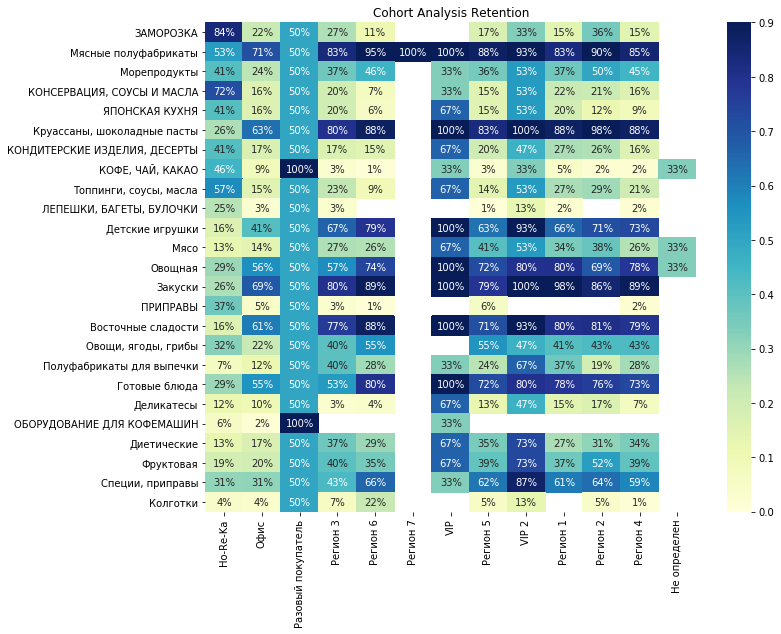

In [32]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis Retention')
sns.heatmap(data = data, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.9,
            cmap = "YlGnBu")
plt.show()

Мы видим, что интересы сегментов местами изолированы. Так "Ho-Re-Ka" - это "заморозка" и "консервация", те категории, которые слабо интересуют другие сегменты. "VIP" и "VIP2" - как раз наоборот нуждаются в широком наборе товаров. 

Товарные группы 'Мясные полуфабрикаты', 'Круассаны, шоколадные пасты', 'Закуски' - оптимально использовать для продвижения, так как эти группы интересны большинству сегментов. 

Но давайте вернемся к миссии. Для этого мы выполним кластеризацию в разрезе отдельных покупок и попробуем посомтреть, что является центром интересов. Ведь у одного и того же клиента в зависимости от ситуации можуг быть разные миссии покупок. 

## Сегментация на основе потребностей

Анализ проведем в разрезе гурпп товаров (Level 2).

In [33]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import rc
from sklearn.cluster import KMeans

In [34]:
df_level2=df.pivot_table(values=['Level2'], index='Invoice', aggfunc={'Level2': list})
df_level2['Level2']=df_level2.Level2.apply(lambda x: list(set(x)))
df_level2['Cnt']=df_level2.Level2.apply(lambda x: len(x))

In [46]:
print('Всего счетов: ', len(df_level2))
print('Счетов с более чем одной группой товаров: ', len(df_level2[df_level2['Cnt']>2]))

Всего счетов:  8605
Счетов с более чем одной группой товаров:  8605


Удалим счета, где меньше двух покупок, чтобы результаты были более показательными. И подготовим данные для кластеризации.

In [40]:
df_level2=df_level2[df_level2['Cnt']>2]
print(len(df_level2))
df_level2.head()

8605


,Level2,Cnt
Invoice,,
00UT-000002,"[Овощная, Мясные полуфабрикаты, Восточные слад...",7
00UT-000005,"[Овощная, Мясные полуфабрикаты, Восточные слад...",6
00UT-000006,"[Мясные полуфабрикаты, Закуски, Готовые блюда]",3
00UT-000007,"[Готовые блюда, Детские игрушки, Мясные полуфа...",6
00UT-000012,"[Фруктовая, Овощная, Круассаны, шоколадные пасты]",3


In [41]:
a=df_level2.Level2
f=df.Level2.unique()
df_clust=pd.DataFrame([ [0 for k2 in range(len(f))] for k1 in range(len(a))], columns=list(f))
for i in range(len(a)):
    for k in a[i]:
        df_clust.loc[i][k]=1

In [42]:
df_clust.head()

,ЗАМОРОЗКА,Мясные полуфабрикаты,Морепродукты,"КОНСЕРВАЦИЯ, СОУСЫ И МАСЛА",ЯПОНСКАЯ КУХНЯ,"Круассаны, шоколадные пасты","КОНДИТЕРСКИЕ ИЗДЕЛИЯ, ДЕСЕРТЫ","КОФЕ, ЧАЙ, КАКАО","Топпинги, соусы, масла","ЛЕПЕШКИ, БАГЕТЫ, БУЛОЧКИ",...,Восточные сладости,"Овощи, ягоды, грибы",Полуфабрикаты для выпечки,Готовые блюда,Деликатесы,ОБОРУДОВАНИЕ ДЛЯ КОФЕМАШИН,Диетические,Фруктовая,"Специи, приправы",Колготки
0,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Фактически мы получаем бинарную матрицу. Если в счете была товарная группа, в ячейке на пересечении 1. Иначе - 0.

In [43]:
data_for_clust=df_clust
from sklearn import preprocessing
dataNorm = preprocessing.normalize(data_for_clust)

In [44]:
data_dist = pdist(data_for_clust, 'euclidean')
data_linkage = linkage(data_dist, method='average')

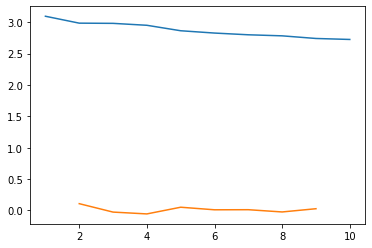

clusters: 2


In [45]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("clusters:", k)

"Метод локтя" рекомендует выполнять кластеризацию исходя из 9 кластеров. 

Выполним кластеризацию.

In [47]:
km_m = KMeans(n_clusters=9).fit(dataNorm)
df_clust['group_no']=km_m.labels_+1

Результаты можно представить в виде таблицы. Где на пересечении, какая часть счетов в данном кластере содержит ту или иную группу.

In [48]:
res1=df_clust.groupby('group_no').mean()
res1['Количество']=df_clust.groupby('group_no').size().values
res1.T

group_no,1,2,3,4,5,6,7,8,9
ЗАМОРОЗКА,0.79,0.04,0.02,0.04,0.04,0.03,0.03,0.03,0.04
Мясные полуфабрикаты,0.33,0.81,0.41,0.90,0.94,0.89,0.72,0.26,0.71
Морепродукты,0.13,0.08,0.04,0.06,0.08,0.08,0.08,0.05,0.10
"КОНСЕРВАЦИЯ, СОУСЫ И МАСЛА",0.77,0.03,0.02,0.03,0.03,0.03,0.03,0.02,0.03
ЯПОНСКАЯ КУХНЯ,0.39,0.06,0.04,0.07,0.03,0.05,0.04,0.04,0.08
"Круассаны, шоколадные пасты",0.07,0.00,1.00,0.00,0.68,0.57,0.55,0.79,0.73
"КОНДИТЕРСКИЕ ИЗДЕЛИЯ, ДЕСЕРТЫ",0.19,0.04,0.04,0.03,0.03,0.04,0.03,0.03,0.08
"КОФЕ, ЧАЙ, КАКАО",0.08,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.01
"Топпинги, соусы, масла",0.30,0.05,0.03,0.02,0.02,0.03,0.05,0.03,0.10
"ЛЕПЕШКИ, БАГЕТЫ, БУЛОЧКИ",0.14,0.02,0.00,0.01,0.01,0.01,0.00,0.01,0.02


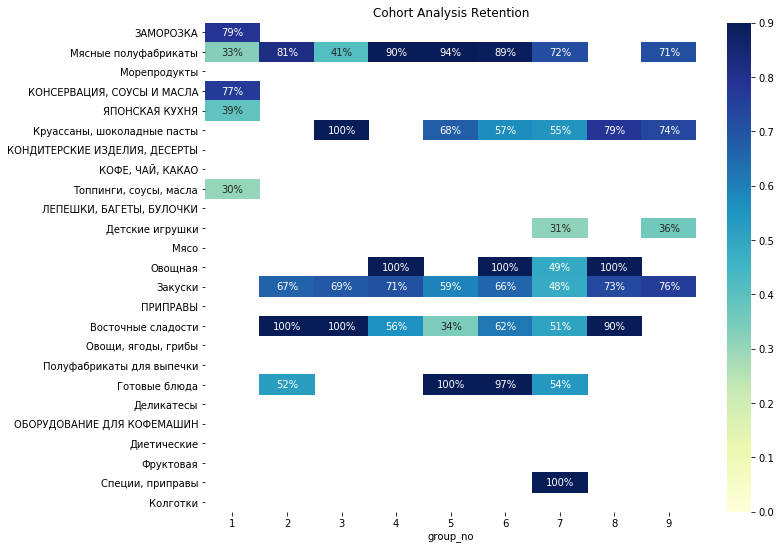

In [49]:
res2=res1.T
res2[res2<0.3]=np.nan

plt.figure(figsize = (11,9))
plt.title('Cohort Analysis Retention')
sns.heatmap(data = res2.loc[res2.index[:-1]], 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.9,
            cmap = "YlGnBu")
plt.show()

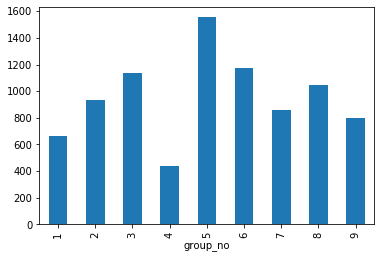

In [50]:
res1['Количество'].plot.bar()

Кластера по количеству счетов распределены относительно равномерно. Не наблюдается явных выбросов кроме 4 кластера. 

Более наглядно в виде тепловой карты. Удалены все значения меньше 0.3, чтобы картина была более наглядной. 

Так у нас есть явный сегмент "Заморозка и консервация, соусы, масла".

Если отбросить слабые дефиринциаторы (берут многие кластера), то видим кластер с миссиями "Овощная" + "Готовые блюда". 

Давайте посмотрим на миссии в разрезе не счетов, а клиентов.

In [51]:
df_level2=df.pivot_table(values=['Level2'], index='Name', aggfunc={'Level2': list})
df_level2['Level2']=df_level2.Level2.apply(lambda x: list(set(x)))
df_level2['Cnt']=df_level2.Level2.apply(lambda x: len(x))
print(len(df_level2))
len(df_level2[df_level2['Cnt']>1])
print(len(df_level2))

608
608


Все клиенты брали больше одной товарной группы 2-го уровня. 

In [52]:
data_for_clust=df_clust
dataNorm = preprocessing.normalize(data_for_clust)

In [53]:
data_dist = pdist(data_for_clust, 'euclidean')
data_linkage = linkage(data_dist, method='average')

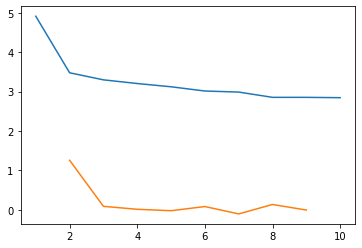

clusters: 2


In [54]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("clusters:", k)

"Метод локтя" указывает на два кластера, но я бы брал 8 кластеров. Отчасти, они будут схожи, так как большое количество клиентов имело небольшое количество заказов.

In [55]:
km_m = KMeans(n_clusters=8).fit(dataNorm)
df_clust['group_no']=km_m.labels_+1
df_clust.head()

,ЗАМОРОЗКА,Мясные полуфабрикаты,Морепродукты,"КОНСЕРВАЦИЯ, СОУСЫ И МАСЛА",ЯПОНСКАЯ КУХНЯ,"Круассаны, шоколадные пасты","КОНДИТЕРСКИЕ ИЗДЕЛИЯ, ДЕСЕРТЫ","КОФЕ, ЧАЙ, КАКАО","Топпинги, соусы, масла","ЛЕПЕШКИ, БАГЕТЫ, БУЛОЧКИ",...,"Овощи, ягоды, грибы",Полуфабрикаты для выпечки,Готовые блюда,Деликатесы,ОБОРУДОВАНИЕ ДЛЯ КОФЕМАШИН,Диетические,Фруктовая,"Специи, приправы",Колготки,group_no
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [56]:
res1=df_clust.groupby('group_no').mean()
res1['Количество']=df_clust.groupby('group_no').size().values
res1

,ЗАМОРОЗКА,Мясные полуфабрикаты,Морепродукты,"КОНСЕРВАЦИЯ, СОУСЫ И МАСЛА",ЯПОНСКАЯ КУХНЯ,"Круассаны, шоколадные пасты","КОНДИТЕРСКИЕ ИЗДЕЛИЯ, ДЕСЕРТЫ","КОФЕ, ЧАЙ, КАКАО","Топпинги, соусы, масла","ЛЕПЕШКИ, БАГЕТЫ, БУЛОЧКИ",...,"Овощи, ягоды, грибы",Полуфабрикаты для выпечки,Готовые блюда,Деликатесы,ОБОРУДОВАНИЕ ДЛЯ КОФЕМАШИН,Диетические,Фруктовая,"Специи, приправы",Колготки,Количество
group_no,,,,,,,,,,,,,,,,,,,,,
1,0.03,0.44,0.07,0.03,0.05,0.68,0.04,0.01,0.06,0.01,...,0.08,0.04,0.09,0.01,0.00,0.08,0.14,0.22,0.00,2522
2,0.02,0.41,0.04,0.02,0.04,0.99,0.04,0.01,0.04,0.01,...,0.05,0.02,0.06,0.01,0.00,0.08,0.07,0.08,0.00,1150
3,0.82,0.43,0.09,0.74,0.00,0.06,0.20,0.10,0.31,0.23,...,0.07,0.00,0.09,0.01,0.00,0.02,0.04,0.04,0.00,404
4,0.04,0.97,0.08,0.03,0.04,0.64,0.03,0.00,0.03,0.01,...,0.17,0.04,1.00,0.01,0.00,0.06,0.11,0.14,0.00,2947
5,0.75,0.18,0.20,0.81,1.00,0.08,0.16,0.06,0.29,0.02,...,0.05,0.00,0.03,0.02,0.00,0.02,0.04,0.05,0.00,259
6,0.04,1.00,0.08,0.03,0.06,0.00,0.04,0.00,0.01,0.02,...,0.09,0.01,0.02,0.01,0.00,0.08,0.15,0.07,0.00,490
7,0.05,0.68,0.06,0.03,0.08,0.00,0.05,0.01,0.05,0.02,...,0.05,0.01,0.00,0.00,0.00,0.09,0.13,0.05,0.01,348
8,0.02,0.90,0.07,0.03,0.02,0.00,0.02,0.00,0.04,0.01,...,0.11,0.00,1.00,0.01,0.00,0.06,0.11,0.04,0.00,485


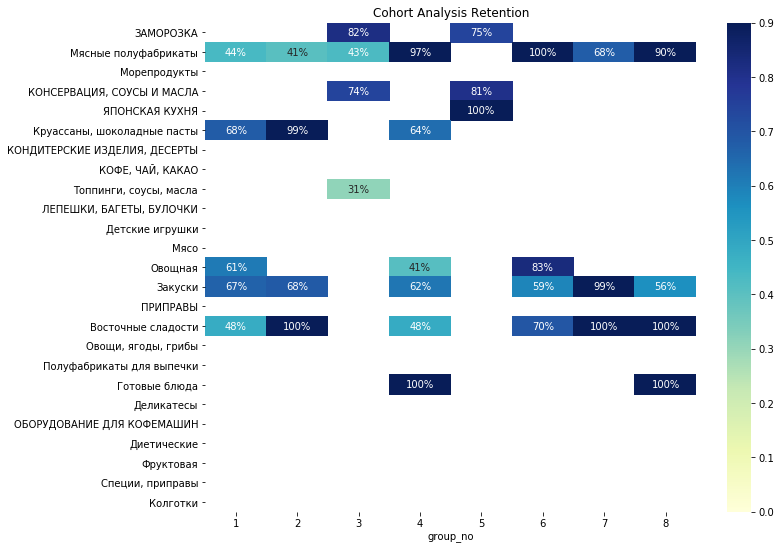

In [57]:
res2=res1.T
res2[res2<0.3]=np.nan

plt.figure(figsize = (11,9))
plt.title('Cohort Analysis Retention')
sns.heatmap(data = res2.loc[res2.index[:-1]], 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.9,
            cmap = "YlGnBu")
plt.show()

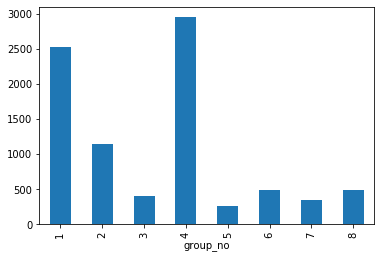

In [58]:
res1['Количество'].plot.bar()

Как и ожидалось, мы получили достаточно похожие сегменты. Но можно говорить о выбросах, есть относительно малочисленые кластеры. Их стоит изучить более внимательно. 

Если продолжать данную сегментацию, то нам стоит ее совместить в будущем с прибыльностью и коэффициентами удержания. Так как фактически мы говорим о изолированных товарных предпочтениях. Это позволит как выделить наиболее привлекательные сегменты, так и принять обоснованное решение об оптимизации товарной матрицы. 

Если продолжать анализ покупательских предпочтений, то нельзя обойти стороной потенциал допродаж. И здесь нам помогжет выработать статистически обоснованные решения метод "Ассоциативные правила".

# Ассоциативные правила

*Подробнее, например, https://habr.com/ru/company/ods/blog/353502/*

Впервые задача поиска ассоциативных правил была предложена для нахождения типичных шаблонов покупок, совершаемых в супермаркетах, поэтому иногда ее еще называют анализом рыночной корзины (market basket analysis). Целью анализа является установление следующих зависимостей: если в транзакции встретился некоторый набор элементов XX, то на основании этого можно сделать вывод о том, что другой набор элементов YY также же должен появиться в этой транзакции. Установление таких зависимостей дает нам возможность находить очень простые и интуитивно понятные правила.

Рассмотрим на примере. 

In [59]:
# загрузим пакеты, необходимые для выполнения анализа
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [60]:
# подготовим данные
df_level2=df.pivot_table(values=['Level2'], index='Invoice', aggfunc={'Level2': list})
df_level2['Level2']=df_level2.Level2.apply(lambda x: list(set(x)))
df_level2['Cnt']=df_level2.Level2.apply(lambda x: len(x))
df_level2=df_level2[df_level2['Cnt']>1]
df_level2.head()

,Level2,Cnt
Invoice,,
00UT-000001,"[КОФЕ, ЧАЙ, КАКАО, Топпинги, соусы, масла]",2
00UT-000002,"[Овощная, Мясные полуфабрикаты, Восточные слад...",7
00UT-000003,"[Детские игрушки, Закуски]",2
00UT-000005,"[Овощная, Мясные полуфабрикаты, Восточные слад...",6
00UT-000006,"[Мясные полуфабрикаты, Закуски, Готовые блюда]",3


In [61]:
te = TransactionEncoder()
te_ary = te.fit(df_level2.Level2.values).transform(df_level2.Level2.values)
df_as = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_as, min_support=0.05, use_colnames=True)

In [65]:
rules_brand=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules_brand

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Детские игрушки),(Восточные сладости),0.18,0.46,0.10,0.58,1.24,0.02,1.27
1,(Восточные сладости),(Закуски),0.46,0.53,0.30,0.64,1.20,0.05,1.30
2,(Закуски),(Восточные сладости),0.53,0.46,0.30,0.56,1.20,0.05,1.21
3,(Восточные сладости),"(Круассаны, шоколадные пасты)",0.46,0.47,0.27,0.58,1.25,0.05,1.28
4,"(Круассаны, шоколадные пасты)",(Восточные сладости),0.47,0.46,0.27,0.58,1.25,0.05,1.28
...,...,...,...,...,...,...,...,...,...
153,"(Восточные сладости, Мясные полуфабрикаты, Ово...","(Круассаны, шоколадные пасты)",0.08,0.47,0.05,0.63,1.36,0.01,1.45
154,"(Восточные сладости, Закуски, Овощная, Круасса...",(Мясные полуфабрикаты),0.08,0.59,0.05,0.67,1.13,0.01,1.23
155,"(Мясные полуфабрикаты, Закуски, Овощная, Круас...",(Восточные сладости),0.07,0.46,0.05,0.77,1.66,0.02,2.32
156,"(Мясные полуфабрикаты, Овощная, Круассаны, шок...","(Восточные сладости, Закуски)",0.10,0.30,0.05,0.55,1.86,0.02,1.57


In [69]:
rules_brand[rules_brand.antecedents == frozenset({'Восточные сладости', 'Мясные полуфабрикаты'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,"(Восточные сладости, Мясные полуфабрикаты)",(Готовые блюда),0.28,0.35,0.15,0.55,1.56,0.05,1.44
46,"(Восточные сладости, Мясные полуфабрикаты)",(Закуски),0.28,0.53,0.18,0.64,1.21,0.03,1.31
51,"(Восточные сладости, Мясные полуфабрикаты)","(Круассаны, шоколадные пасты)",0.28,0.47,0.16,0.57,1.22,0.03,1.23


In [70]:
rules_brand[rules_brand.antecedents == frozenset({'Восточные сладости'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Восточные сладости),(Закуски),0.46,0.53,0.30,0.64,1.20,0.05,1.30
3,(Восточные сладости),"(Круассаны, шоколадные пасты)",0.46,0.47,0.27,0.58,1.25,0.05,1.28
5,(Восточные сладости),(Мясные полуфабрикаты),0.46,0.59,0.28,0.60,1.02,0.00,1.02


Мы получили 158 патернов покупок. Например, если клиент "забросил" в корзину набор (Овощная, Круассаны, шоколадные пасты, Закуски), то с вероятностью 0,51 (confidence) он приобретет еще и (Восточные сладости, Мясные полуфабрикаты). Вариантов таких покупок в общей выборке было 5% (support). Кстати, обратное неверно. Клиент, который купит (Восточные сладости, Мясные полуфабрикаты), скорее всего не будет брать (Овощная). Ну или пример попроще, тем кто покупает восточные сладости продавать еще и закуску. Потенциал увеличение около 30%. Часто клиентам просто надо предложить. Исходя из этой информации можно формировать и систему рекомендаций, например, на сайте.

До сих пор мы использовали технологии Data Mining. Пришла пора опробовать Machine Learning. Например, замутить быстро на коленке систему скоринга клиентов. 

# Скоринг клиентов

Попробуем решить интересную практическую задачу: оценить по первому заказу вероятность того, что этот клиент будет работать с намит больше года. 

Подготовим данные.

In [79]:
df_t=df.groupby('Name')['Date'].min().reset_index()
df_t.columns=['Name', 'StartYear']
df_invoice=df_invoice.merge(df_t, on='Name')
df_invoice['StartYear']=df_invoice['StartYear'].apply(lambda x: x.year)

In [80]:
df_invoice=df_invoice.sort_values(by=['Date'],  ascending=True).reset_index()

In [81]:
df_name=df_invoice.groupby('Name').first().reset_index()
df_t=df_invoice.groupby('Name').nth(-1)['Date'].reset_index()
df_t.columns=['Name', 'last_date']
df_name=df_name.merge(df_t, on='Name')
df_name['Delta']=(df_name['last_date']-df_name['Date'])
df_name['Delta']=df_name['Delta'].apply(lambda x: x.days)

df_name.sample(5)

,Name,level_0,index,Invoice,Date,Profit,Qnty,Revenue,Segment,InvoiceYear,StartYear,last_date,Delta
35,андрейка,6935,6546,Фр00-002992,2015-02-12,"2,060.57",61.00,"5,600.00",Регион 4,2015,2015,2017-02-24,743
332,линя,18054,12909,Фр00-010143,2016-02-08,"2,944.45",38.00,"7,679.00",Ho-Re-Ka,2016,2016,2017-09-02,572
478,петуля,12134,5387,Фр00-001802,2015-06-11,840.52,51.00,"2,385.00",Офис,2015,2015,2016-12-08,546
37,андроныч,17297,14272,Фр00-011701,2016-01-09,"4,128.30",332.00,"11,911.00",Регион 2,2016,2015,2017-03-30,446
440,нона,10762,3828,Фр00-000212,2015-05-10,"2,833.70",96.00,"7,053.00",Офис,2015,2015,2015-12-10,214


В этой таблице мы собрали базовую информацию о клиентах. 
* 'Date' - дата первой покупки. 
* 'last_date' - дата последней покупки. 
* 'Delta' - разница в днях между последней и первой датой. 

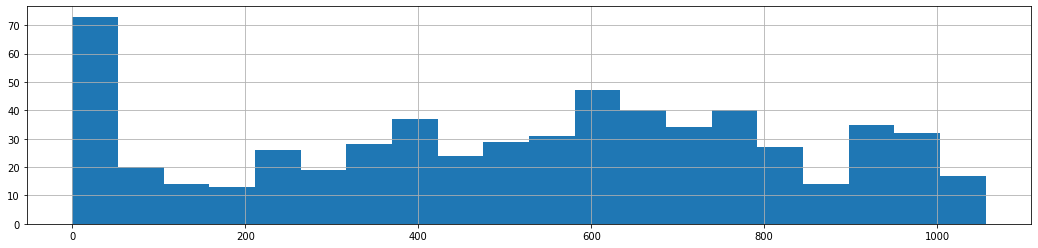

In [82]:
df_name.Delta.hist(figsize=(18,4), bins=20);

In [83]:
df_name.Delta.describe()

count     600.00
mean      516.23
std       309.12
min         0.00
25%       287.00
50%       546.50
75%       754.00
max     1,056.00
Name: Delta, dtype: float64

Мы видим, что 50% клиентов сотрудничали с нами больше 546 дней. Но для прогнозирования возьмем период год. Нас будет интересовать вопрос, будет ли этот клиент сотрудничать с нами больше одного года или нет.

Для того, чтобы дать ответ на этот вопрос, расширим набор полей нашей таблицы.

In [84]:
df_t2=df.groupby('Invoice')['SKU'].apply(list)[df_name.Invoice].reset_index()
df_name=df_name.merge(df_t2, on='Invoice')

In [85]:
df_name['SKU']=df_name.SKU.apply(lambda x: list(set(x)))
df_name['Cnt']=df_name.SKU.apply(lambda x: len(x))

print(len(df_name))
df_name=df_name[df_name.StartYear<2017]
print(len(df_name))

df_name['Y']=df_name.Delta.apply(lambda x: 1 if x>365 else 0)
df_name['Segment_f']=pd.factorize(df_name['Segment'])[0]

df_name.sample(5)

600
559


,Name,level_0,index,Invoice,Date,Profit,Qnty,Revenue,Segment,InvoiceYear,StartYear,last_date,Delta,SKU,Cnt,Y,Segment_f
407,надюша,19219,14469,Фр00-011933,2016-07-09,"2,577.87",122.00,"7,351.00",Ho-Re-Ka,2016,2016,2017-11-01,480,"[MIX Сухарика гренка (со вк.аджики,холодца с х...",40,1,4
37,андроныч,17297,14272,Фр00-011701,2016-01-09,"4,128.30",332.00,"11,911.00",Регион 2,2016,2015,2017-03-30,446,"[Крем для торта Вишневый Рецепты вкуса,80г,1/2...",13,1,5
562,феодора,3522,3755,Фр00-000138,2015-01-10,724.80,87.00,"1,892.00",Офис,2015,2015,2016-07-04,541,[Соломка-Крендели микс с солью 160г. пласт.уп....,17,1,0
384,митра,15973,6179,Фр00-002615,2015-11-24,37.35,3.00,84.00,Регион 4,2015,2015,2017-10-01,677,"[Сухарики пшеничные ""Клинские снеки"" с доб.оли...",1,1,2
489,ромуля,2050,3778,Фр00-000162,2015-01-10,"4,685.70",65.00,"10,032.00",Регион 1,2015,2015,2016-12-22,712,[7 DAYS Круассаны Сгущенка 3+1 (4* 65г). 1/7ш...,7,1,6


'Cnt' - это количество наименований, которые были в первом заказе. А 'Segment_f'- это закодированный числами сегмент. 'Y' равен нулю если клиент работал с нами меньше 365 дней и 1 если больше. Фактически это целевая величина, которую будем предсказывать. 

Для обучения модели будем будем использовать четыре параметра:
* сумма первого счета
* количество единиц товара 
* количество наименований товара
* сегмент

In [86]:
df_name.columns

Index(['Name', 'level_0', 'index', 'Invoice', 'Date', 'Profit', 'Qnty',
       'Revenue', 'Segment', 'InvoiceYear', 'StartYear', 'last_date', 'Delta',
       'SKU', 'Cnt', 'Y', 'Segment_f'],
      dtype='object')

In [87]:
col=['Revenue', 'Qnty', 'Segment_f', 'Cnt']

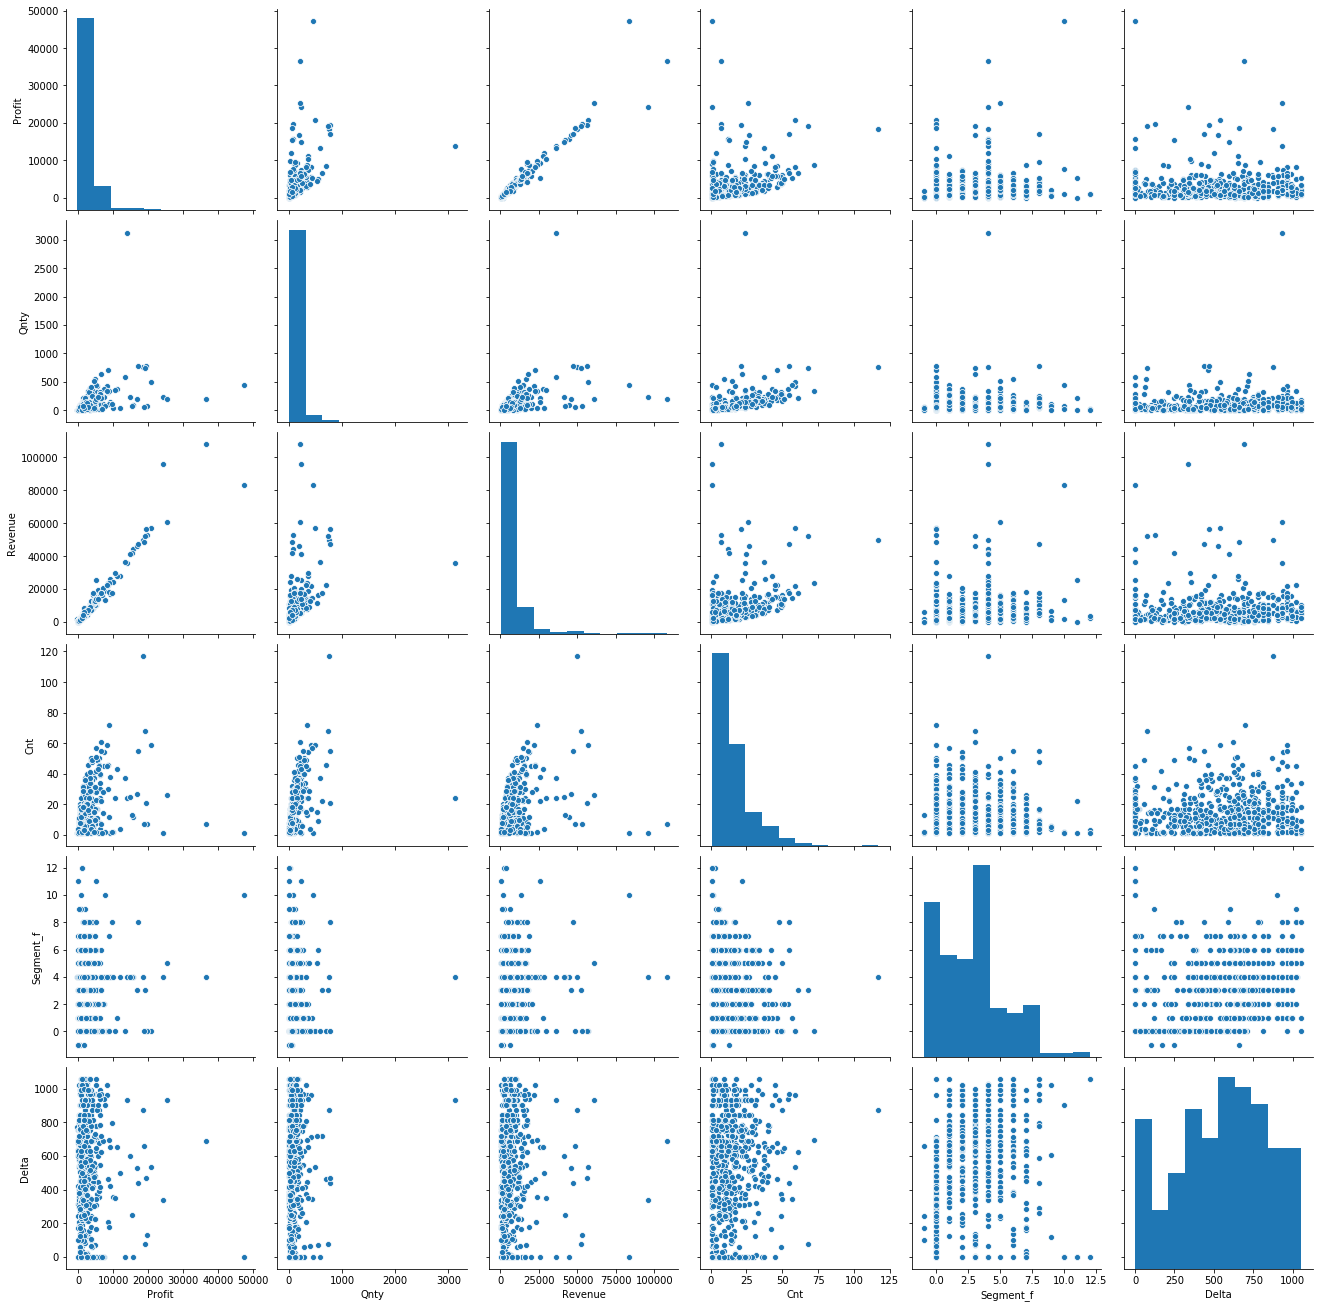

In [88]:
sns.pairplot(df_name[['Profit', 'Qnty', 'Revenue', 'Cnt', 'Segment_f', 'Delta']],height=3);

За счет выбросов на всегда очевидна зависимость между сроком сотрудничества и другими параметрами. Возможно, алгоритм машинного обучения RandomForest сможет выявить и учесть взаимосвязи.

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

In [90]:
model = RandomForestClassifier(n_estimators=10)
model.fit(df_name[col], df_name.Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.2947, 'Revenue'], [0.2657, 'Qnty'], [0.2596, 'Segment_f'], [0.18, 'Cnt']]

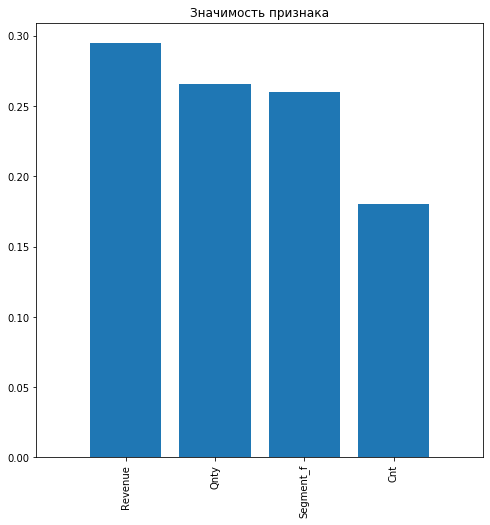

In [92]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [93]:
r2_score(model.predict(df_name[col]), df_name.Y)

0.8805319918458605

Мы получили модель с R2=0.88, что очень неплохо. Про точность поговрим чуть позже. Пока, хочу проилюстрровать умение RandomForest показывать значимость признаков на принятие моделью решения. Оказалось, что одинаковую роль играет сумма и количество единиц товара. Далее принадлежность к сегменту и на третьем месте количество наименований товара. Получается нам интереснее привлекать клиентов кто берет много одного наименования. Допродажи не сильно будут влиять на продолжительность сотрудничества.

Или можно выдвинуть гипотезу, что постоянные клиенты очень чувствительны к конкурентоспособности предложения и склонны работать с несколькими поставщиками. 


Что касается точности нашей модели. 

In [94]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [95]:
conf_mat = confusion_matrix(df_name.Y, model.predict(df_name[col]))
print(conf_mat)

[[143   8]
 [  5 403]]


In [96]:
print(classification_report(df_name.Y, model.predict(df_name[col])))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       151
           1       0.98      0.99      0.98       408

    accuracy                           0.98       559
   macro avg       0.97      0.97      0.97       559
weighted avg       0.98      0.98      0.98       559



Если отбросить эффект переобучения (мы не формировали обучающую и тестовую выборку), то результат вполне интересный. Точность модели (accuracy) 98%. Модель 8 раз из 143 ошиблась, указав что клиент будет работать с нами больше года. И 5 раз из 403 неправильно классифицировала клиентов, которые сотрудничали больше года.

Даже если точность модели упадет на тестовой выборке до 65-70%, она может быть очень полезна для скоринга клиентов на входе. 

# Выводы

В данном блокноте представлен достаточно полный и комплексный анализ клиентской базы. Методология может быть применена с небольшими уточнениями и дополнениями как к b2b, так и b2c компаниям. 

Выводы позволяют принимать решения как в части приоритета по клиентам, так и по ассортименту. Собранная информация может быть основной для применения более сложных и результативных подходов с применением машинного обучения. 